<a href="https://colab.research.google.com/github/mjgpinheiro/Physics_models/blob/main/LSTM_StockPrice_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# pip install numpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout
import os
import tensorflow as tf
tf.__version__

'2.14.0'

In [12]:
df = pd.read_csv('/content/sample_data/AAPL.csv')

df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


# Nova secção

# Nova secção

# Nova secção

In [13]:
df = df['open'].values
df = df.reshape(-1,1)
print(df.shape)
df[:7]

(1259, 1)


array([[67.7142],
       [68.0714],
       [68.5014],
       [66.7442],
       [66.3599],
       [66.9785],
       [65.8714]])

In [14]:
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8)-50:])

In [15]:
dataset_test.shape

(302, 1)

In [16]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_train[:7]

array([[0.15550899],
       [0.16002875],
       [0.16546966],
       [0.1432353 ],
       [0.13837263],
       [0.14619996],
       [0.1321915 ]])

In [17]:
dataset_test = scaler.transform(dataset_test)
dataset_test[:7]

array([[0.7048619 ],
       [0.70865789],
       [0.70043325],
       [0.71080895],
       [0.69518213],
       [0.68006144],
       [0.69056368]])

In [18]:
def create_my_dataset(df):
    x = []
    y = []
    for i in range(50,df.shape[0]):
        x.append(df[i-50:i,0])
        y.append(df[i,0])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [19]:
x_train,y_train = create_my_dataset(dataset_train)
x_train[:1]

array([[0.15550899, 0.16002875, 0.16546966, 0.1432353 , 0.13837263,
        0.14619996, 0.1321915 , 0.12602681, 0.10489581, 0.11077074,
        0.11908522, 0.10095558, 0.10928904, 0.10137187, 0.09043563,
        0.07199725, 0.06057385, 0.08412669, 0.06603248, 0.07561229,
        0.07552245, 0.08609681, 0.07317274, 0.0810899 , 0.09030909,
        0.09667117, 0.12929896, 0.1255384 , 0.11252448, 0.12040496,
        0.13868011, 0.14003654, 0.12380363, 0.11180072, 0.09748478,
        0.07163663, 0.07845043, 0.08277153, 0.06603248, 0.06666515,
        0.06939446, 0.07254007, 0.08269814, 0.08347632, 0.07055098,
        0.06073581, 0.0583861 , 0.03076649, 0.        , 0.00844228]])

In [20]:
x_train[:1].shape

(1, 50)

In [21]:
x_test,y_test = create_my_dataset(dataset_test)
x_test[:1]

array([[0.7048619 , 0.70865789, 0.70043325, 0.71080895, 0.69518213,
        0.68006144, 0.69056368, 0.68423703, 0.68120024, 0.70144551,
        0.71979279, 0.73219302, 0.73915233, 0.75433628, 0.7586384 ,
        0.7724305 , 0.76395279, 0.77584689, 0.77660608, 0.7709121 ,
        0.7612956 , 0.77306316, 0.78571645, 0.77217743, 0.77470809,
        0.76395279, 0.76458545, 0.76547118, 0.77635302, 0.79115737,
        0.80153307, 0.80115347, 0.80311474, 0.80583519, 0.79609216,
        0.81709663, 0.80950465, 0.82279061, 0.81709663, 0.81140264,
        0.82241101, 0.83822763, 0.84417468, 0.82886419, 0.83164791,
        0.90604929, 0.91800665, 0.9222455 , 0.93262121, 0.95046235]])

In [22]:
#x_train.shape
#(957,50,1)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
print(x_train.shape)
print(x_test.shape)

(957, 50, 1)
(252, 50, 1)


In [23]:
model = Sequential()
model.add(LSTM(units=96,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 96)            37632     
                                                                 
 dropout (Dropout)           (None, 50, 96)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50, 96)            74112     
                                                                 
 dropout_1 (Dropout)         (None, 50, 96)            0         
                                                                 
 lstm_2 (LSTM)               (None, 96)                74112     
                                                                 
 dropout_2 (Dropout)         (None, 96)                0         
                                                                 
 dense (Dense)               (None, 1)                 9

In [25]:
model.compile(loss = 'mean_squared_error', optimizer='adam')

In [26]:
if (not os.path.exists(r'C:\Users\danie\Desktop\LSTM\stock_prediction.h5')):
    model.fit(x_train,y_train, epochs=50, batch_size=32)
    model.save(r'C:\Users\danie\Desktop\LSTM\stock_prediction.h5')

Epoch 1/50
30/30 [==============================] - 10s 114ms/step - loss: 0.0433
Epoch 2/50
30/30 [==============================] - 3s 115ms/step - loss: 0.0069
Epoch 3/50
30/30 [==============================] - 5s 177ms/step - loss: 0.0045
Epoch 4/50
30/30 [==============================] - 3s 114ms/step - loss: 0.0048
Epoch 5/50
30/30 [==============================] - 3s 116ms/step - loss: 0.0043
Epoch 6/50
30/30 [==============================] - 4s 129ms/step - loss: 0.0041
Epoch 7/50
30/30 [==============================] - 5s 161ms/step - loss: 0.0044
Epoch 8/50
30/30 [==============================] - 3s 114ms/step - loss: 0.0047
Epoch 9/50
30/30 [==============================] - 3s 114ms/step - loss: 0.0037
Epoch 10/50
30/30 [==============================] - 4s 143ms/step - loss: 0.0041
Epoch 11/50
30/30 [==============================] - 4s 146ms/step - loss: 0.0037
Epoch 12/50
30/30 [==============================] - 3s 113ms/step - loss: 0.0037
Epoch 13/50
30/30 [=====

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [27]:
model = load_model(r'C:\Users\danie\Desktop\LSTM\stock_prediction.h5')

8/8 [==============================] - 2s 48ms/step
range(1007, 1259)


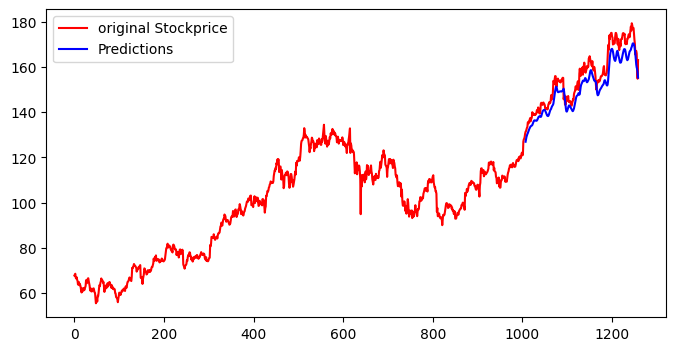

In [28]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

fig,ax = plt.subplots(figsize=(8,4))
plt.plot(df,color='red', label='original Stockprice')
ax.plot(range(len(y_train)+50, len(y_train)+50+len(predictions)),predictions, color='blue',label='Predictions')
plt.legend()
print(range(len(y_train)+50,len(y_train)+50+len(predictions)))

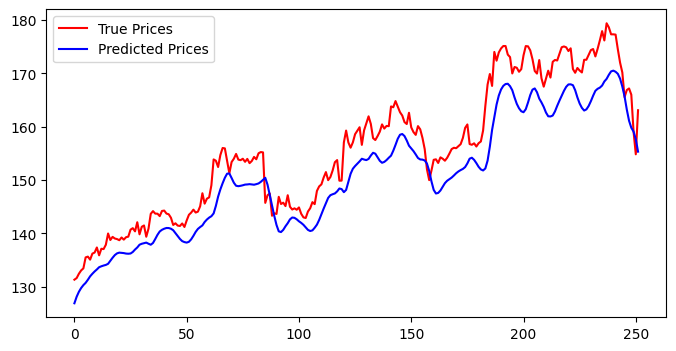

In [29]:
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1,1))

fig,ax = plt.subplots(figsize=(8,4))
ax.plot(y_test_scaled, color='red',label='True Prices')
plt.plot(predictions,color="blue",label = 'Predicted Prices')
plt.legend()